In [48]:
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv('Dat12Jan2021.csv')
df.head()


,longitude,latitude,noisedB,seconds
0,27.091134,93.615735,63.283447,1610437001
1,27.091134,93.615735,63.283447,1610437001
2,27.091121,93.615755,60.112976,1610437002
3,27.091121,93.615755,58.297077,1610437003
4,27.091121,93.615755,61.898243,1610437004


In [50]:
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])


True
      longitude   latitude    noisedB     seconds
1     27.091134  93.615735  63.283447  1610437001
70    27.091205  93.615876  71.606682  1610437080
72    27.091213  93.615887  76.393539  1610437095
77    27.091220  93.615969  76.393539  1610437095
80    27.091204  93.616022  76.393539  1610437095
...         ...        ...        ...         ...
1089  27.091163  93.615913  74.413239  1610438808
1091  27.091163  93.615913  72.622383  1610438809
1093  27.091163  93.615913  70.653877  1610438810
1096  27.091163  93.615913  69.786491  1610438812
1097  27.091163  93.615913  69.786491  1610438812

[155 rows x 4 columns]


In [51]:
print(df.shape)
# delete duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(1110, 4)
(955, 4)


In [52]:
df =df[['longitude','latitude','seconds','noisedB']]

In [53]:
df.head()

,longitude,latitude,seconds,noisedB
0,27.091134,93.615735,1610437001,63.283447
2,27.091121,93.615755,1610437002,60.112976
3,27.091121,93.615755,1610437003,58.297077
4,27.091121,93.615755,1610437004,61.898243
5,27.091159,93.615754,1610437005,64.606201


In [54]:
x = df.iloc[:,0:3]
x

,longitude,latitude,seconds
0,27.091134,93.615735,1610437001
2,27.091121,93.615755,1610437002
3,27.091121,93.615755,1610437003
4,27.091121,93.615755,1610437004
5,27.091159,93.615754,1610437005
...,...,...,...
1105,27.091154,93.615827,1610438821
1106,27.091156,93.615821,1610438822
1107,27.091157,93.615819,1610438823
1108,27.091161,93.615817,1610438824


In [55]:
y = df.iloc[:,3:4]
y

,noisedB
0,63.283447
2,60.112976
3,58.297077
4,61.898243
5,64.606201
...,...
1105,75.734497
1106,69.763222
1107,78.343590
1108,75.700264


In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

In [59]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_features=1, n_estimators=100, random_state = 0)
regressor.fit(x_train,y_train.ravel())
y_pred = regressor.predict(x_test)

In [60]:
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.2556277503723087

In [61]:
from sklearn.model_selection import GridSearchCV

max_features_range = np.arange(1,3,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(x_train,y_train.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [62]:
print("The best parameters are %s"
      % (grid_search.best_params_))

The best parameters are {'max_features': 2, 'n_estimators': 200}


In [63]:
final_model = grid_search.best_estimator_


final_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.2263280063384813

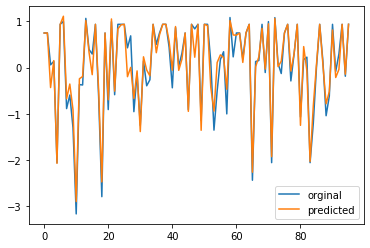

In [64]:
import matplotlib.pyplot as plt
plt.plot(y_test,label = "orginal")
plt.plot(final_predictions, label = "predicted")
plt.legend()
plt.show()